Front Page

# Report Index 📊

1. **Executive Summary** 📝  
   _Key findings and recommendations._


2. **Dataset Overview** 📋  
   _Summary of data sources, time period, and key variables._


3. **Introduction to Exploratory Data Analysis (EDA)** 🔍  
   _Key steps of the EDA process._


4. **SWOT Analysis** 🧠  
   _Analysis of **Strengths**, **Weaknesses**, **Opportunities**, and **Threats** based on insights from EDA._


5. **Recommendations** 💡  
   _Actionable recommendations for business improvement based on EDA and SWOT analysis._


6. **Next Steps** 🚀  
   _Suggested actions for deeper analysis to explore emerging opportunities._

Executive Summary

### Dataset Overview

The dataset used for this analysis contains **sales transactions** and related **customer**, **geography**, and **product details** from **2014 to 2017**, with a total of **9,994 records**.  

Key variables include:

- **Profit**, **Sales** and **Discount**: Financial metrics.
- **Product Category**, **Sub-Category** and **Product Name**: Classification of products.
- **Customer Segment** and **Customer Name**: Customer types.
- **Geographical Data**: Information on **Region**, **State**, **City**, and **Postal Code**.
- **Order and Transaction Information**: Includes **Order ID**, **Order Date** and **Quantity** sold.

This dataset provides a comprehensive view of the company's operations over a four-year period, enabling the analysis of various factors that influence profitability, product mix and regional performance.

### Exploratory Data Analysis (EDA) Overview

In this report, we present the findings of an in-depth Exploratory Data Analysis (EDA) performed on the dataset using Python. The primary goal of this analysis is to uncover valuable insights regarding the factors influencing profitability, while identifying areas for potential improvement and growth.  

The main steps included:

- **Data Quality Assessment and Cleaning**: Established a solid foundation for analysis by identifying and resolving data inconsistencies.  

- **New Metrics Creation**: Calculated key financial metrics like **List Price**, **Net Price**, **COGS**, and **Gross Margin**, to provide deeper insights.  

- **Descriptive Statistics & Correlation**: Analyzed **Profit** distribution and correlations with numerical variables to identify **key drivers** of profitability.  

- **Categorical Analysis**: Explored relationships between **Profit** and dimensions like **Customer**, **Product** and **Geography**, including annual trends.  

- **Hypothesis Testing**: Assessed regional **pricing and discount strategies** to identify significant variations across states.  

- **Profit Classification & Clustering**: Classified **Profit** levels (Low, Medium, High) and used dimensionality reduction and **clustering algorithm** to identify clusters within low-profit segment.  

These findings provide a deeper understanding of the company's strengths and challenges, which we will now explore through a **SWOT analysis**.

### SWOT Analysis
  
  
  
<img src="https://github.com/Kristinawk/final_project_ETL_Analytics/blob/main/notebooks/support_doc/swot2.PNG?raw=true" width=1200 align="Left">

In [1]:
# Imports

import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter

import umap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import textwrap

pd.set_option('display.max_columns', None)

In [2]:
# Pre-processed dataset

df = pd.read_csv('../data/Superstore_250307.csv')

In [3]:
# Profit distribution

per_05 = df['Profit'].quantile(0.05)
per_95 = df['Profit'].quantile(0.95)

print(f'90% of Profit distribution is between {int(per_05)} and {int(per_95)} dollars')

90% of Profit distribution is between -53 and 168 dollars


Text(0.35, -0.1, '(*) Profit data excludes extreme outliers.')

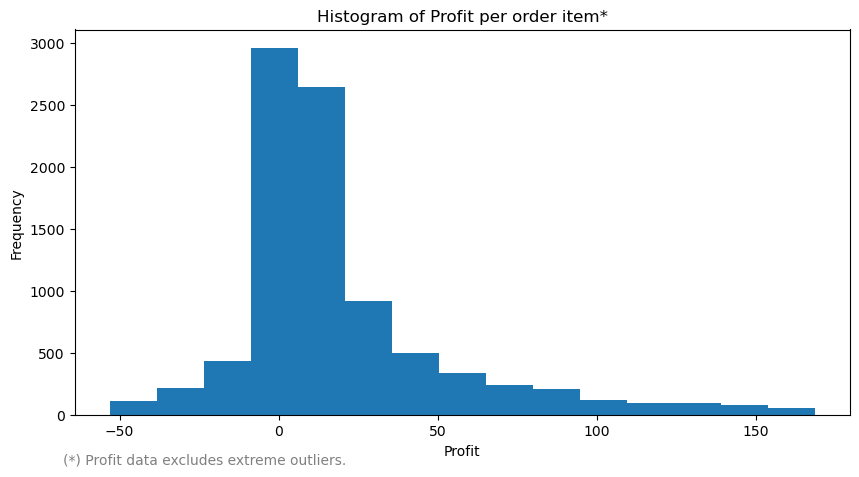

In [4]:
# Profit Histogram

plt.ioff()

data = df['Profit']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
ax = data.plot.hist(bins=15, range=(per_05, per_95))
ax.set_xlabel('Profit')
ax.set_title('Histogram of Profit per order item*')

# Add footnote
plt.text(0.35, -0.1, '(*) Profit data excludes extreme outliers.', 
         ha='right', va='top', transform=ax.transAxes, fontsize=10, color='gray')

### Introduction to SWOT

The Exploratory Data Analysis was performed to identify key drivers and trends in profit.

💰 **Profit Statistics**
- The average profit per order item is **28,66 \$**, with a standard deviation of **234,26 \$**.
- **90%** of item profits fall within the range of **-53 \$** **to 168 \$**.
- However, there are a few outliers, with profits ranging from **-6.600 \$** **to 8.400 \$**.

In [5]:
plt.ion()
plt.show()

In [6]:
# Share of items with negative profit

# Create two sub-sets
profit_neg = df[df['Profit'] < 0 ]
profit_pos = df[df['Profit'] >= 0 ]

# Group by year
profit_neg = profit_neg.groupby('Order Year')['Row ID'].count().reset_index(name='Negative Profit')
profit_pos = profit_pos.groupby('Order Year')['Row ID'].count().reset_index(name='Positive Profit')

# Calculate the share of items with negative profit
result = pd.merge(profit_neg, profit_pos, on='Order Year')
result['Negative profit share'] = (result['Negative Profit'] / (result['Negative Profit'] + result['Positive Profit']))

result.drop(['Negative Profit', 'Positive Profit'], axis=1, inplace=True)

In [7]:
# Profit annual trend

profit_yr = df.groupby('Order Year')['Profit'].sum().reset_index(name='Total Profit')

data = pd.merge(result, profit_yr, on='Order Year')

In [8]:
# Profit evolution bar-chart

plt.ioff()

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for Total Profit on the primary y-axis
ax1.bar(data['Order Year'], data['Total Profit'], color='tab:blue', label='Total Profit')
ax1.set_xlabel('Order Year')
ax1.set_ylabel('Total Profit')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands
ax1.set_xticks(data['Order Year'].unique())

# Create secondary y-axis
ax2 = ax1.twinx()
# Plot the line chart for Negative Profit Share on the secondary y-axis
ax2.plot(data['Order Year'], data['Negative profit share'], color='tab:red', marker='o', label='Negative Profit Share')
ax2.set_ylabel('Items share with (-) Profit')
ax2.set_ylim(0, 0.50)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%')) # set format to percentage

# Set title
plt.title('Total Profit & Proportion of items with Negative Profit')

# Show the legend
fig.tight_layout()  # Adjust layout to make room for both y-axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

### Introduction to SWOT

📈 **Profit Annual Trend**

The total profit exhibits a **positive annual trend**, while the proportion of order items with negative profit remains consistently stable at **18%**.

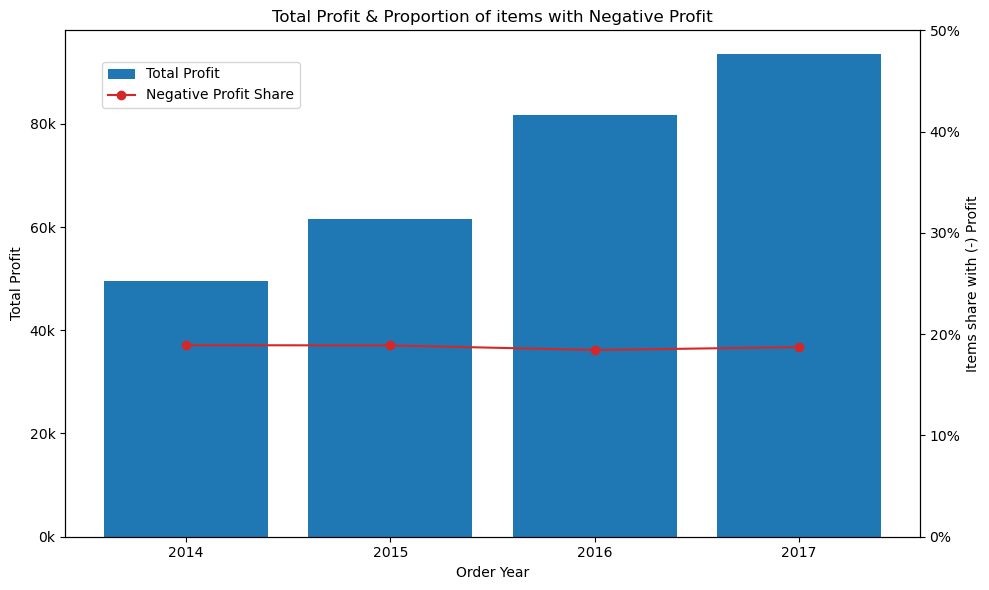

In [9]:
plt.ion()
plt.show()

In [10]:
# Correlation matrix

# Define numerical variables
num_vars_hm = [
    'Profit',
    'COGS',
    'List Price',
    'Net Price',
    'Discount',
    'Quantity',
    'Sales',
    'Gross Margin',
    'Shipping Days',
    'Order Month']

In [11]:
# Heatmap

plt.ioff()

# Define dataframe with numerical variables
df_num_vars_hm = df[num_vars_hm]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(df_num_vars_hm.corr(),
                 vmin=-1,
                 vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 annot=True,
                 fmt=".2f",
                 ax=ax)

# Set title
plt.title('Correlation Matrix')

# Adjust layout
plt.tight_layout()

### Introduction to SWOT

🔧 **Profit Levers**

The analysis reveals several important insights into the supermarket's profit drivers:

1. **Profit Drivers**: **List Price**, **Net Price**, and **Sales** are the most influential factors with a **positive impact** on **Profit**. 
2. **Discounts**: Discounts not only fail to boost sales volume but also have a **very negative impact** on **Gross Profit**, suggesting that the current discount strategy significantly reduces overall profitability.
3. **Quantity**: Quantity shows a low correlation with **Profit**, likely due to the absence of correlation between **Quantity** and **Price**. This behavior may indicate potential anomalies in the dataset, which was flagged during the preliminary ETL process.
4. **Shipping Days & Order Month**: Neither Shipping Days nor the Order Month appear to have any meaningful impact on **Profit**, suggesting they do not significantly influence sales or profitability in this dataset.

💡 These findings emphasize the need for a reevaluation of the supermarket's discount strategy, while highlighting the importance of optimizing pricing and sales practices for better profitability.

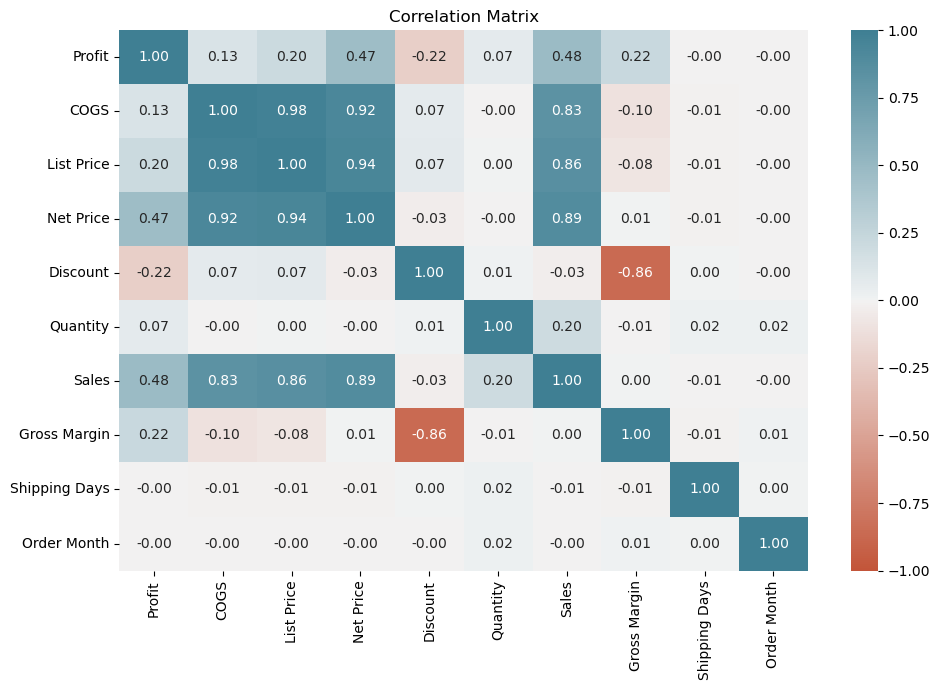

In [12]:
# 🔧 Profit Levers

plt.ion()
plt.show()

In [13]:
# Numeric Variables, evolution over time:

# Create a copy of original dataframe and add Discount Value for calculations:
df_year = df.copy()
df_year['Discount Value'] = df_year['Discount'] * df_year['List Price'] * df_year['Quantity']

# Group data by year
df_year_grouped = df_year.groupby('Order Year')[['Profit', 'Sales', 'List Price', 'Net Price', 'Discount', 'Gross Margin', 'Quantity', 'Discount Value']].sum()

# Re-calculate relative metrics
df_year_grouped['List Price'] = (df_year_grouped['Sales'] + df_year_grouped['Discount Value']) / df_year_grouped['Quantity']
df_year_grouped['Net Price'] = df_year_grouped['Sales'] / df_year_grouped['Quantity']
df_year_grouped['Discount'] = 1 - (df_year_grouped['Net Price'] / df_year_grouped['List Price'])
df_year_grouped['Gross Margin'] = df_year_grouped['Profit'] / df_year_grouped['Sales']

# Reset index
df_year_grouped.reset_index(inplace=True)

In [14]:
# Annual trend line-charts

plt.ioff()

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 4.5))

# Plot 'Profit' and 'Sales' on the first subplot
axes[0].plot(df_year_grouped['Order Year'], df_year_grouped['Profit'], label='Profit', color='tab:blue')
axes[0].plot(df_year_grouped['Order Year'], df_year_grouped['Sales'], label='Sales', color='tab:orange')
axes[0].set_title('Profit and Sales annual trend')
axes[0].set_xlabel('Order Year')
axes[0].set_ylabel('Amount')
axes[0].legend()
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands
axes[0].set_xticks(data['Order Year'].unique())

# Plot 'List Price' and 'Net Price' on the second subplot
axes[1].plot(df_year_grouped['Order Year'], df_year_grouped['List Price'], label='List Price', color='tab:green')
axes[1].plot(df_year_grouped['Order Year'], df_year_grouped['Net Price'], label='Net Price', color='tab:red')
axes[1].set_title('List Price and Net Price annual trend')
axes[1].set_xlabel('Order Year')
axes[1].set_ylabel('Price')
axes[1].legend()
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}')) # set format to two decimal places
axes[1].set_xticks(data['Order Year'].unique())

# Plot 'Discount' and 'Gross Margin' on the third subplot
axes[2].plot(df_year_grouped['Order Year'], df_year_grouped['Discount'], label='Discount', color='tab:purple')
axes[2].plot(df_year_grouped['Order Year'], df_year_grouped['Gross Margin'], label='Gross Margin', color='tab:brown')
axes[2].set_title('Discount and Gross Margin annual trend')
axes[2].set_xlabel('Order Year')
axes[2].set_ylabel('Percentage')
axes[2].legend()
axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%')) # set format to percentage
axes[2].set_xticks(data['Order Year'].unique())

# Adjust layout to prevent overlapping labels
plt.tight_layout()

### Introduction to SWOT

📈 **Profit Levers: annual trend**

**Net Price** and **List Price** exhibit yearly fluctuations, with declines in 2015 and 2017. **Gross Margin** follows an inverse trend to **Discounts**, reaffirming the negative impact of discounts on margin.

🏆 **Sales** and **Profit** show a consistent positive trend from 2014 to 2017.  
⚠️ Despite the increase in **Total Profit** in 2017, the key concern is the decline in **Gross Margin** due to higher discounts.

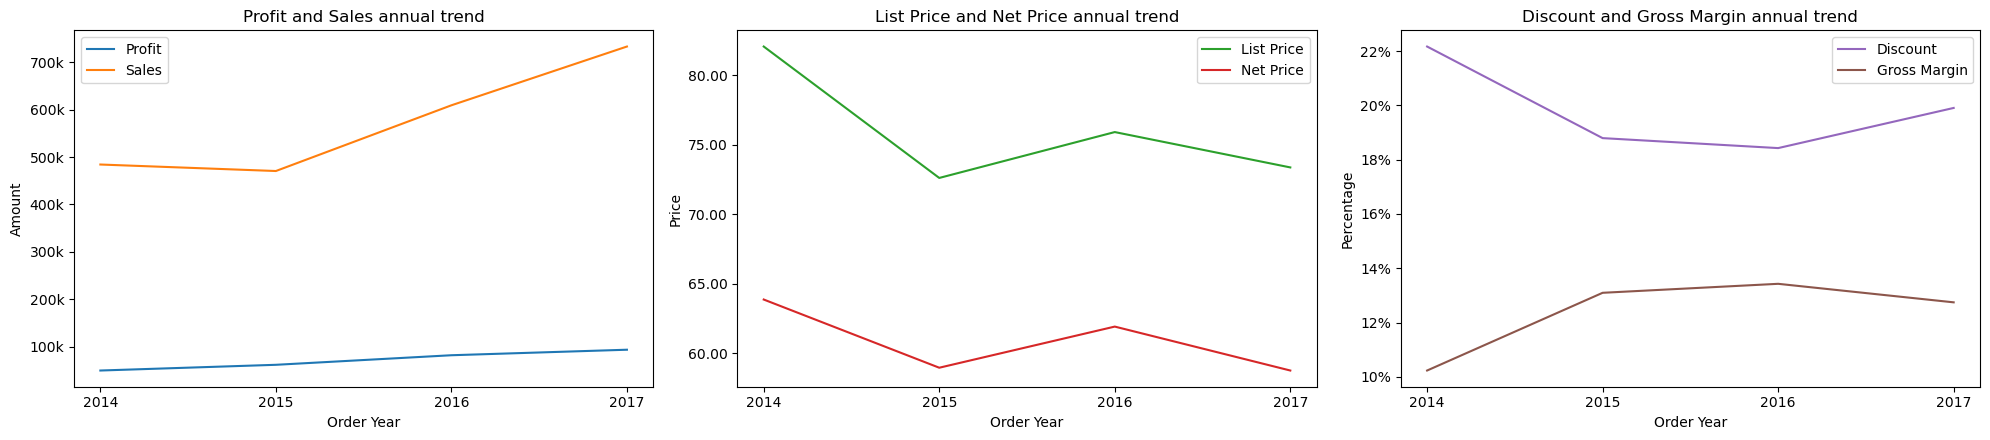

In [15]:
plt.ion()
plt.show()

In [16]:
# Profit vs Sales and Discounts, scatter plots

plt.ioff()

# Create figure and axes for two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 5.5))

# Scatter plot - Profit vs Sales (left plot)
sns.scatterplot(data=df, y='Profit', x='Sales', size='Discount',
                sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[0])

# Update title and axis labels for the left plot
axes[0].set_title('Scatter plot of Profit vs Sales')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Profit')
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands

# Scatter plot - Profit vs Discount (right plot)
sns.scatterplot(data=df, y='Profit', x='Discount', size='Sales',
                sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[1])

# Update title and axis labels for the right plot
axes[1].set_title('Scatter plot of Profit vs Discount')
axes[1].set_xlabel('Discount')
axes[1].set_ylabel('Profit')
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%')) # set format to percentage
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands

# Adjust layout to prevent overlap
plt.tight_layout()

### Introduction to SWOT

🔍 **Discounts deep-dive**

💡⚠️ There is a linear relationship between **Sales** and **Profit**. At lower discount levels, higher sales drive higher profit, but as discounts surpass **40%**, the impact becomes negative, with profit decreasing as discounts increase.

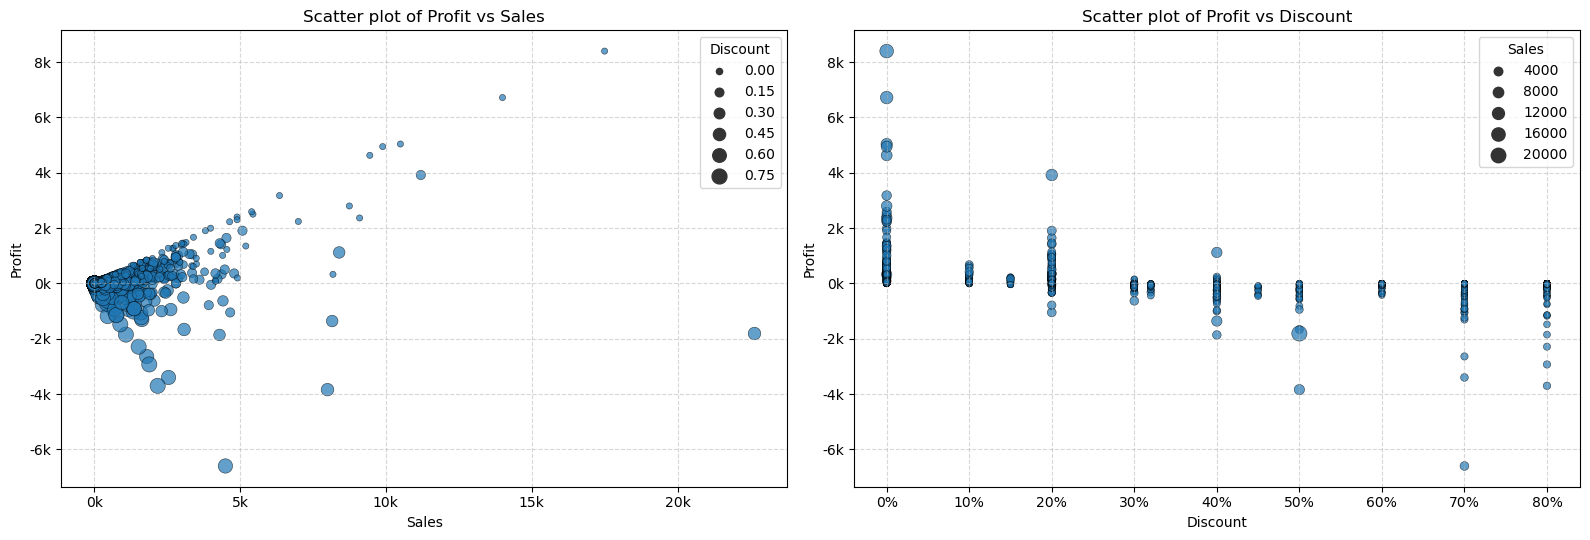

In [17]:
plt.ion()
plt.show()

In [18]:
# Discount plot KDE

plt.ioff()

# Create figure and axis
plt.figure(figsize=(12, 5.5))
sns.kdeplot(data=df, x='Discount', label='Discount', fill=True)

# Update title and axis
plt.title('KDE plot of Discounts and Sales')
plt.xlabel('Discount')
plt.xticks(np.arange(0, 1, step=0.1))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()

### Introduction to SWOT

🔍 **Discounts deep-dive**

💡 The density chart illustrates that the majority of order items are associated with discounts of **0%** and **20%**, highlighting the most frequent discount levels in the dataset.

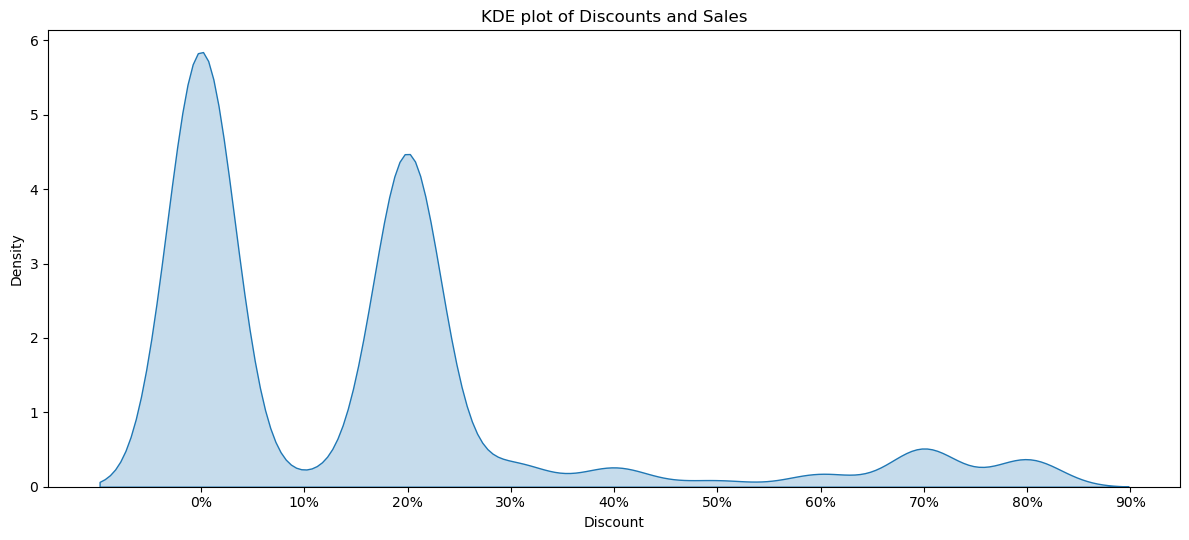

In [19]:
plt.ion()
plt.show()

In [20]:
# Customer Segment KPIs summary

# Create a copy of original dataframe and add Discount Value for calculations:
df_segment = df.copy()
df_segment['Discount Value'] = df_segment['Discount'] * df_segment['List Price'] * df_segment['Quantity']

# Group data by Segment
df_segment_grouped = df_segment.groupby('Segment')[['Profit', 'Sales', 'List Price', 'Net Price', 'Discount', 'Gross Margin', 'Quantity', 'Discount Value']].sum()

# Re-calculate relative metrics
df_segment_grouped['List Price'] = (df_segment_grouped['Sales'] + df_segment_grouped['Discount Value']) / df_segment_grouped['Quantity']
df_segment_grouped['Net Price'] = df_segment_grouped['Sales'] / df_segment_grouped['Quantity']
df_segment_grouped['Discount'] = 1 - (df_segment_grouped['Net Price'] / df_segment_grouped['List Price'])
df_segment_grouped['Gross Margin'] = df_segment_grouped['Profit'] / df_segment_grouped['Sales']

# Reset index
df_segment_grouped.reset_index(inplace=True)

# Drop Discount Value
df_segment_grouped.drop(['Discount Value'], axis=1, inplace=True)

# Sort by Profit
df_segment_grouped.sort_values(by='Profit', ascending=False, inplace=True)

# Reorder the columns 
new_column_order = ['Segment', 'List Price', 'Net Price', 'Discount', 'Quantity', 'Sales', 'Profit', 'Gross Margin']
df_segment_grouped = df_segment_grouped[new_column_order]

In [21]:
# Profit and Sales by Customer Segment, pie charts

plt.ioff()

# Create a 1x3 subplot grid (one column for each metric)
fig, axes = plt.subplots(1, 2, figsize=(17, 3))

# Create the pie chart for Profit by Segment
axes[0].pie(df_segment_grouped['Sales'], labels=df_segment_grouped['Segment'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
axes[0].axis('equal')
axes[0].set_title('Sales', fontsize=16)

# Create the pie chart for Sales by Segment
axes[1].pie(df_segment_grouped['Profit'], labels=df_segment_grouped['Segment'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
axes[1].axis('equal')
axes[1].set_title('Profit', fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

### Introduction to SWOT

📚 **Profit by Customer Segment**

💡 The **Consumer Segment** contributes to more than half of the total sales, accounting for **50.6%**. It also generates the largest share of **Profit**, representing **46.8%**. However, it is important to note that this segment has the **lowest Net Price** and **Gross Margin** compared to others.

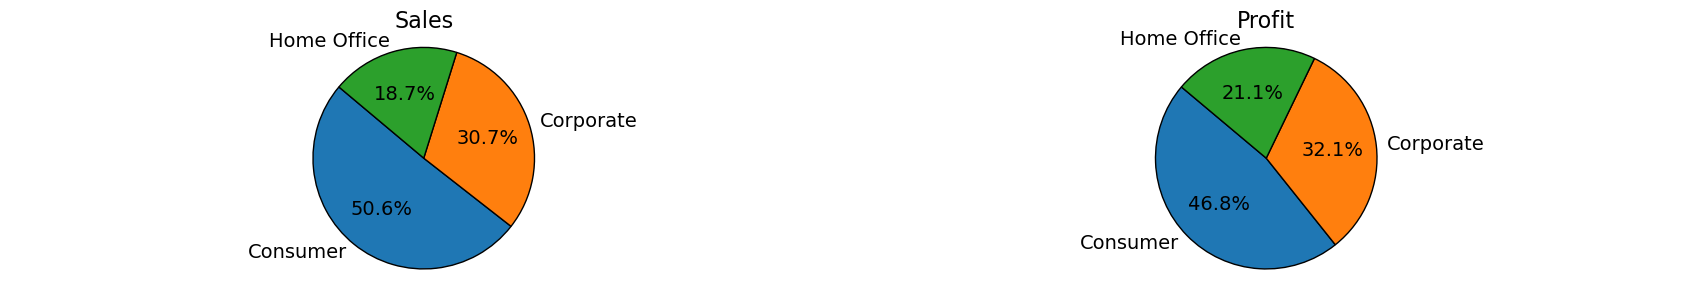

In [22]:
plt.ion()
plt.show()

In [23]:
df_segment_grouped.style.format({'Profit': '{:,.0f}', 'Sales': '{:,.0f}', 'List Price': '{:.2f}', 'Net Price': '{:.2f}',
                                'Discount': '{:.2f}', 'Gross Margin': '{:.2f}', 'Quantity': '{:,.0f}'})

,Segment,List Price,Net Price,Discount,Quantity,Sales,Profit,Gross Margin
0,Consumer,74.61,59.49,0.20,"19,521","1,161,401","134,119",0.12
1,Corporate,74.43,60.83,0.18,"11,608","706,146","91,979",0.13
2,Home Office,80.59,63.71,0.21,"6,744","429,653","60,299",0.14


In [24]:
# Customer Segment annual trend, bar charts

plt.ioff()

# Group data by Segment and Year, aggregate Profit
df_segment_year = df.groupby(['Segment', 'Order Year'])['Profit'].sum().reset_index()
segments = df_segment_year['Segment'].unique()

# Create subplots (one for each segment)
fig, axes = plt.subplots(nrows=1, ncols=len(segments), figsize=(13, 4))

# Define a color for the bars
bar_color = '#1f77b4'

# Loop through each segment and plot its respective bar chart
for ax, segment in zip(axes, segments):

    segment_data = df_segment_year[df_segment_year['Segment'] == segment]
    
    sns.barplot(data=segment_data, x='Order Year', y='Profit', ax=ax, color=bar_color)
    
    ax.set_title(f'Profit by Year for Seg. {segment}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Profit')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands

# Adjust layout
plt.tight_layout()

### Introduction to SWOT

📈 **Profit by Customer Segment: annual trend**

💡 Profit showed a consistent increase across all segments year-over-year, with the exception of the **Corporate** segment, where total profit experienced a decline in 2017.  
⚠️ This highlights a potential area of concern for the Corporate segment.

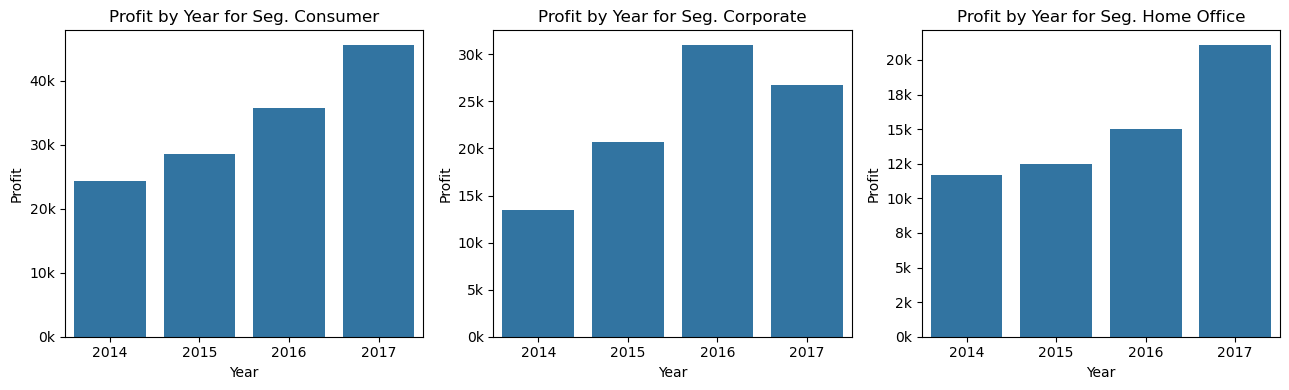

In [25]:
plt.ion()
plt.show()

In [35]:
# Top10 and Bottom10 customers by Profit, bar charts

plt.ioff()

# Sort the dataframe by 'Profit' and get the top and bottom 10 customers
top_10_customers = df.groupby('Customer Name')['Profit'].sum().reset_index()
top_10_customers = top_10_customers.sort_values(by='Profit', ascending=False).head(10)

bottom_10_customers = df.groupby('Customer Name')['Profit'].sum().reset_index()
bottom_10_customers = bottom_10_customers.sort_values(by='Profit', ascending=True).head(10)

# Create subplots: left for top 10, right for bottom 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Top 10 Bar Chart with muted green bars with varying transparency
sns.barplot(data=top_10_customers, x='Customer Name', y='Profit', ax=axes[0], palette=['darkgreen']*len(top_10_customers))
axes[0].set_title('Top 10 Customers by Profit')
axes[0].set_xlabel('Customer Name')
axes[0].set_ylabel('Profit')
axes[0].tick_params(axis='x', rotation=45)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands

# Bottom 10 Bar Chart with muted red bars with varying transparency
sns.barplot(data=bottom_10_customers, x='Customer Name', y='Profit', ax=axes[1], palette=['darkred']*len(bottom_10_customers))
axes[1].set_title('Bottom 10 Customers by Profit')
axes[1].set_xlabel('Customer Name')
axes[1].set_ylabel('Profit')
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands

# Adjust layout
plt.tight_layout()

In [29]:
# Additional insights

top_10_customers = df.groupby(['Segment', 'State', 'Customer Name'])['Profit'].sum().reset_index()
top_10_customers = top_10_customers.sort_values(by='Profit', ascending=False).head(10)

bottom_10_customers = df.groupby(['Segment', 'State', 'Customer Name'])['Profit'].sum().reset_index()
bottom_10_customers = bottom_10_customers.sort_values(by='Profit', ascending=True).head(10)

print(top_10_customers)
print(bottom_10_customers)

          Segment         State         Customer Name     Profit
2542    Corporate       Indiana          Tamara Chand  8762.3891
2058     Consumer    Washington          Raymond Buch  6734.4720
448      Consumer      Delaware          Hunter Lopez  5039.9856
883      Consumer      Michigan         Adrian Barton  4946.3700
952      Consumer     Minnesota          Sanjit Chand  4668.6935
3787  Home Office      New York          Tom Ashbrook  4599.2073
570      Consumer       Georgia  Christopher Martinez  3192.0682
1958     Consumer      Virginia          Sanjit Engle  2825.2862
3904  Home Office  Rhode Island         Daniel Raglin  2640.4798
885      Consumer      Michigan           Andy Reiter  2602.0939
          Segment           State     Customer Name     Profit
1358     Consumer            Ohio     Cindy Stewart -6892.3748
2864    Corporate  North Carolina    Grant Thornton -3825.3394
1810     Consumer           Texas       Luke Foster -3805.5490
3468  Home Office        Colorado

### Introduction to SWOT

📚 **Top10 and Bottom10 Customers**

💡 The top-performing customer is **Tamara Chand** from the **Corporate** Segment in **Indiana**, while the lowest-performing customer is **Cindy Stewart** from the **Consumer** Segment in **Ohio**.  
⚠️ It is important to highlight that there are at least 10 customers generating negative profits.

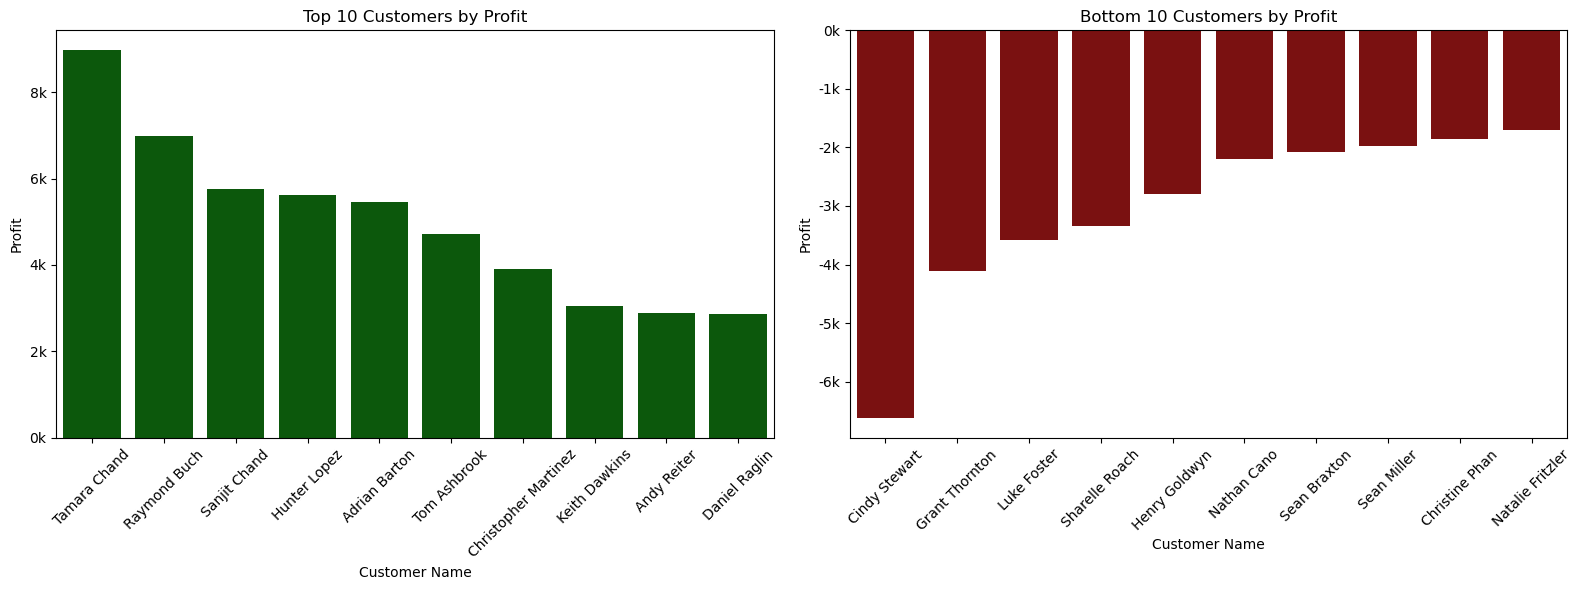

In [36]:
plt.ion()
plt.show()

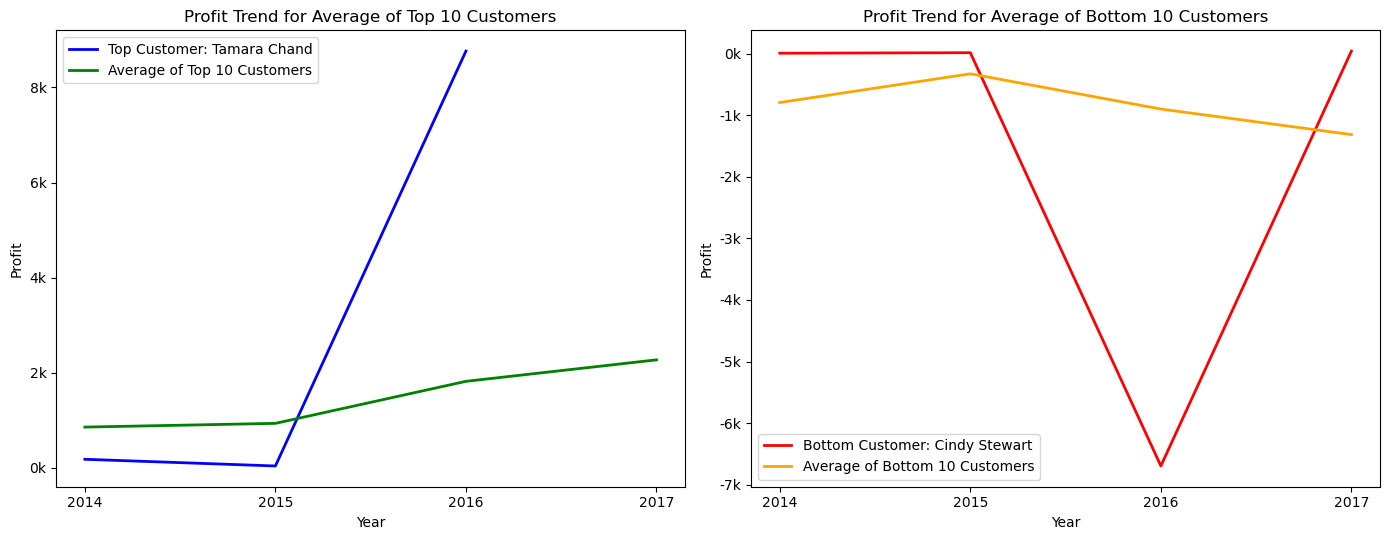

In [31]:
# Top10 and Bottom10 customers by Profit, annual trend

# Step 1: Calculate total profit for each customer
customer_profit = df.groupby('Customer Name')['Profit'].sum().reset_index()

# Step 2: Get top 10 and bottom 10 customers based on total profit
top_10_customers = customer_profit.nlargest(10, 'Profit')['Customer Name']
bottom_10_customers = customer_profit.nsmallest(10, 'Profit')['Customer Name']

# Step 3: Filter the original dataframe for top 10 and bottom 10 customers
df_top10 = df[df['Customer Name'].isin(top_10_customers)]
df_bottom10 = df[df['Customer Name'].isin(bottom_10_customers)]

# Step 4: Calculate the yearly profit trends for top 10 and bottom 10 customers
df_top10_yearly = df_top10.groupby(['Order Year', 'Customer Name'])['Profit'].sum().reset_index()
df_bottom10_yearly = df_bottom10.groupby(['Order Year', 'Customer Name'])['Profit'].sum().reset_index()

# Step 5: Aggregate to get the average profit per year for top 10 and bottom 10 customers
df_top10_avg = df_top10_yearly.groupby('Order Year')['Profit'].mean().reset_index()
df_bottom10_avg = df_bottom10_yearly.groupby('Order Year')['Profit'].mean().reset_index()

# Step 6: Get the top-performing customer (just the one with the highest profit)
top_customer = customer_profit.nlargest(1, 'Profit')['Customer Name'].iloc[0]
df_top_customer_yearly = df[df['Customer Name'] == top_customer].groupby(['Order Year'])['Profit'].sum().reset_index()

# Step 7: Get the bottom-performing customer (just the one with the lowest profit)
bottom_customer = customer_profit.nsmallest(1, 'Profit')['Customer Name'].iloc[0]
df_bottom_customer_yearly = df[df['Customer Name'] == bottom_customer].groupby(['Order Year'])['Profit'].sum().reset_index()

# Step 8: Create subplots for the profit trends
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.5))

# Plot Top 10 Customers (Average Profit per Year) and Top-performing Customer's Trend
sns.lineplot(data=df_top_customer_yearly, x='Order Year', y='Profit', ax=axes[0], label=f'Top Customer: {top_customer}', color='blue', lw=2)
sns.lineplot(data=df_top10_avg, x='Order Year', y='Profit', ax=axes[0], label='Average of Top 10 Customers', color='green', lw=2)
axes[0].set_title('Profit Trend for Average of Top 10 Customers')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Profit')
axes[0].legend()
axes[0].set_xticks(data['Order Year'].unique())
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k'))


# Plot Bottom 10 Customers (Average Profit per Year) and Bottom-performing Customer's Trend
sns.lineplot(data=df_bottom_customer_yearly, x='Order Year', y='Profit', ax=axes[1], color='red', lw=2, label=f'Bottom Customer: {bottom_customer}')
sns.lineplot(data=df_bottom10_avg, x='Order Year', y='Profit', ax=axes[1], color='orange', lw=2, label='Average of Bottom 10 Customers')
axes[1].set_title('Profit Trend for Average of Bottom 10 Customers')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Profit')
axes[1].legend()
axes[1].set_xticks(data['Order Year'].unique())
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k'))

# Adjust layout
plt.tight_layout()

### Introduction to SWOT

📚 **Top10 and Bottom10 Customers: annual trend**

- The **Top 10 customers' average profit** shows a positive trend, but **Tamara Chand**, the top performer, did not make any purchases in 2017. 

- The **Bottom 10 customers' average profit** has declined over the past two years. **Cindy Stewart**, the lowest performer, had a significant loss in 2016 but has shown near-zero profit since then.

In [37]:
plt.ion()
plt.show()

In [38]:
# Product Category KPIs summary

# Create a copy of the original dataframe and add Discount Value for calculations:
df_category = df.copy()
df_category['Discount Value'] = df_category['Discount'] * df_category['List Price'] * df_category['Quantity']

# Group data by Category
df_category_grouped = df_category.groupby('Category')[['Profit', 'Sales', 'List Price', 'Net Price', 'Discount', 'Gross Margin', 'Quantity', 'Discount Value']].sum()

# Re-calculate relative metrics
df_category_grouped['List Price'] = (df_category_grouped['Sales'] + df_category_grouped['Discount Value']) / df_category_grouped['Quantity']
df_category_grouped['Net Price'] = df_category_grouped['Sales'] / df_category_grouped['Quantity']
df_category_grouped['Discount'] = 1 - (df_category_grouped['Net Price'] / df_category_grouped['List Price'])
df_category_grouped['Gross Margin'] = df_category_grouped['Profit'] / df_category_grouped['Sales']

# Reset index
df_category_grouped.reset_index(inplace=True)

# Drop Discount Value
df_category_grouped.drop(['Discount Value'], axis=1, inplace=True)

# Sort by Profit
df_category_grouped.sort_values(by='Profit', ascending=False, inplace=True)

# Reorder the columns 
new_column_order = ['Category', 'List Price', 'Net Price', 'Discount', 'Quantity', 'Sales', 'Profit', 'Gross Margin']
df_category_grouped = df_category_grouped[new_column_order]

In [39]:
# Profit and Sales by Product Category, pie charts

plt.ioff()

# Create a 1x3 subplot grid (one column for each metric)
fig, axes = plt.subplots(1, 2, figsize=(17, 3))

# Create the pie chart for Profit by Category
axes[0].pie(df_category_grouped['Sales'], labels=df_category_grouped['Category'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
axes[0].axis('equal')
axes[0].set_title('Sales', fontsize=16)

# Create the pie chart for Sales by Category
axes[1].pie(df_category_grouped['Profit'], labels=df_category_grouped['Category'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
axes[1].axis('equal')
axes[1].set_title('Profit', fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

### Introduction to SWOT

📚 **Profit by Product Category**

🏆 **Technology** is the most profitable category, contributing 51% of total profit, with the highest price and a 17% gross margin.  
🏆 **Office Supplies** is the second largest category, accounting for 43% of profit, with the same 17% gross margin.  
⚠️ **Furniture** accounts for 32% of sales but only 6% of profit due to a low 2% gross margin, indicating room for improvement.

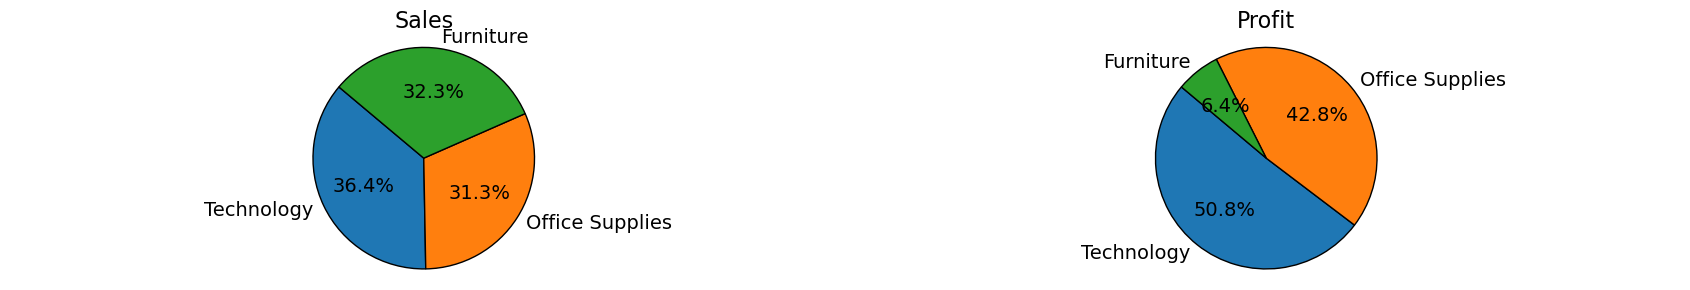

In [40]:
plt.ion()
plt.show()

In [41]:
df_category_grouped.style.format({'Profit': '{:,.0f}', 'Sales': '{:,.0f}', 'List Price': '{:.2f}', 'Net Price': '{:.2f}',
                                'Discount': '{:.2f}', 'Gross Margin': '{:.2f}', 'Quantity': '{:,.0f}'})

,Category,List Price,Net Price,Discount,Quantity,Sales,Profit,Gross Margin
2,Technology,149.65,120.50,0.19,"6,939","836,154","145,455",0.17
1,Office Supplies,39.22,31.39,0.20,"22,906","719,047","122,491",0.17
0,Furniture,115.50,92.43,0.20,"8,028","742,000","18,451",0.02


In [42]:
# Product Category annual trend, bar charts

plt.ioff()

# Group data by Category and Year, aggregate Profit
df_category_year = df.groupby(['Category', 'Order Year'])['Profit'].sum().reset_index()
categories = df_category_year['Category'].unique()

# Create subplots (one for each category)
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(13, 4))

# Define a color for the bars
bar_color = '#1f77b4'

# Loop through each category and plot its respective bar chart
for ax, category in zip(axes, categories):

    category_data = df_category_year[df_category_year['Category'] == category]
    
    sns.barplot(data=category_data, x='Order Year', y='Profit', ax=ax, color=bar_color)
    
    ax.set_title(f'Profit by Year for Cat. {category}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Profit')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands

# Adjust layout
plt.tight_layout()

### Introduction to SWOT

📈 **Profit by Product Category: annual trend**

💡 **Office Supplies** and **Technology** experienced year-over-year growth, while **Furniture** saw a significant decline in both 2015 and 2017.

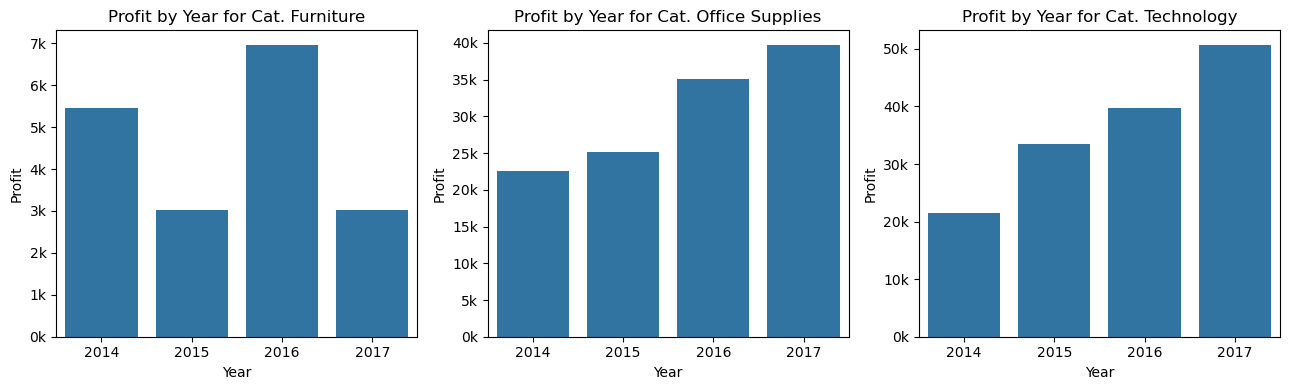

In [43]:
plt.ion()
plt.show()

In [44]:
# Product Sub-Category KPIs summary

# Create a copy of the original dataframe and add Discount Value for calculations:
df_sub_category = df.copy()
df_sub_category['Discount Value'] = df_sub_category['Discount'] * df_sub_category['List Price'] * df_sub_category['Quantity']

# Group data by Sub-Category
df_sub_category_grouped = df_sub_category.groupby(['Category', 'Sub-Category'])[['Profit', 'Sales', 'List Price', 'Net Price', 'Discount', 'Gross Margin', 'Quantity', 'Discount Value']].sum()

# Re-calculate relative metrics
df_sub_category_grouped['List Price'] = (df_sub_category_grouped['Sales'] + df_sub_category_grouped['Discount Value']) / df_sub_category_grouped['Quantity']
df_sub_category_grouped['Net Price'] = df_sub_category_grouped['Sales'] / df_sub_category_grouped['Quantity']
df_sub_category_grouped['Discount'] = 1 - (df_sub_category_grouped['Net Price'] / df_sub_category_grouped['List Price'])
df_sub_category_grouped['Gross Margin'] = df_sub_category_grouped['Profit'] / df_sub_category_grouped['Sales']

# Reset index
df_sub_category_grouped.reset_index(inplace=True)

# Drop Discount Value
df_sub_category_grouped.drop(['Discount Value'], axis=1, inplace=True)

# Sort by Profit
df_sub_category_grouped.sort_values(by='Profit', ascending=False, inplace=True)

# Reorder the columns 
new_column_order = ['Category', 'Sub-Category', 'List Price', 'Net Price', 'Discount', 'Quantity', 'Sales', 'Profit', 'Gross Margin']
df_sub_category_grouped = df_sub_category_grouped[new_column_order]

In [45]:
# Product Sub-categories by Category, bar charts

plt.ioff()

categories = df['Category'].unique()

# Get min and max profit
category_min_profit = df.groupby('Sub-Category')['Profit'].sum().min()*1.1
category_max_profit = df.groupby('Sub-Category')['Profit'].sum().max()*1.1

# Create the figure with a size that adapts to the number of categories
plt.figure(figsize=(15, 5))

# Loop through categories and plot each one
for i, category in enumerate(categories, start=1):
    ax = plt.subplot(1, 3, i)
    
    # Filter data for the current category
    category_data = df[df['Category'] == category]
    
    # Sum profit by Sub-category
    profit_by_subcategory = category_data.groupby('Sub-Category')['Profit'].sum()
    
    # Plot the bar chart with adjusted bar width and spacing
    profit_by_subcategory.plot(kind='bar', width=0.7, ax=ax)  # Decrease width to create space between bars
    
    # Set title and labels
    ax.set_title(f'Category: {category}')
    ax.set_xlabel('Sub-category')
    ax.set_ylabel('Profit')
    
    # Adjust x-tick labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Set y-axis limits to ensure no bars are cut off
    ax.set_ylim(category_min_profit, category_max_profit)

    # Format y-axis in thousands
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # format y-axis in thousands

### Introduction to SWOT

📚 **Profit by Product Sub-Category**

- For **Furniture**, the most profitable sub-category in terms of absolute profit is *Chairs*, while *Furnishings* leads in terms of margin. However, both *Bookcases* and *Tables* show significantly negative profit. 
- Within **Office Supplies**, the most profitable sub-categories are *Appliances*, *Binders*, *Paper*, and *Storage*. However, *Binders* and *Storage* show lower margins due to higher discounts. On the other hand, *Supplies* is generating negative profit.  
- The **Technology** sub-categories generate the highest profit overall, with the exception of *Machines*, which have a very low margin of just 2%.

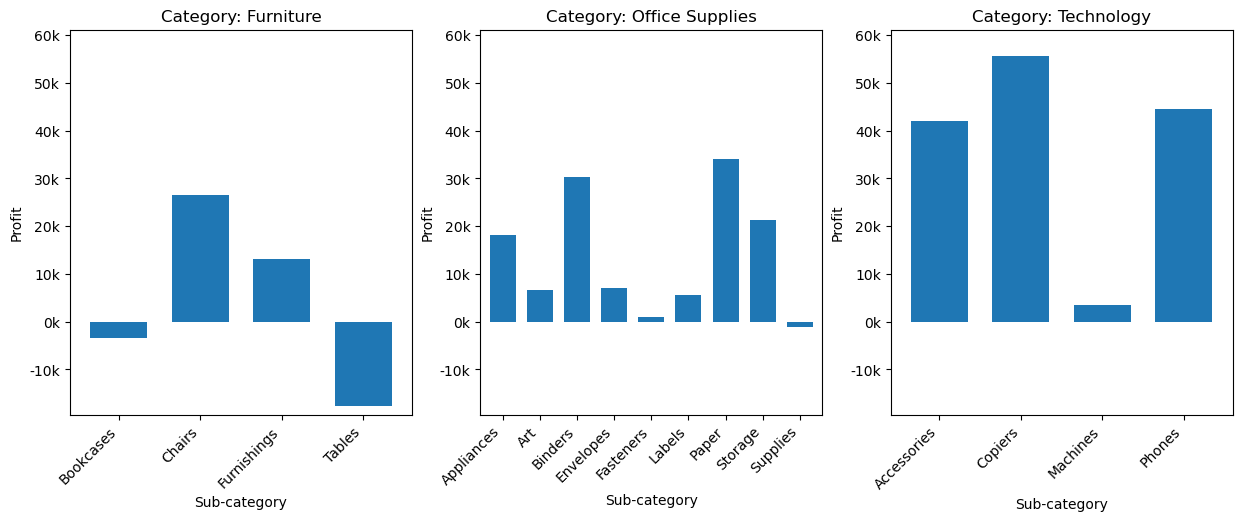

In [46]:
plt.ion()
plt.show()

In [47]:
# 📚 Profit by Product Sub-Category


df_sub_category_grouped.style.format({'Profit': '{:,.0f}', 'Sales': '{:,.0f}', 'List Price': '{:.2f}', 'Net Price': '{:.2f}',
                                'Discount': '{:.2f}', 'Gross Margin': '{:.2f}', 'Quantity': '{:,.0f}'})

,Category,Sub-Category,List Price,Net Price,Discount,Quantity,Sales,Profit,Gross Margin
14,Technology,Copiers,747.21,639.01,0.14,234,"149,528","55,618",0.37
16,Technology,Phones,120.35,100.34,0.17,"3,289","330,007","44,516",0.13
13,Technology,Accessories,60.36,56.24,0.07,"2,976","167,380","41,937",0.25
10,Office Supplies,Paper,16.38,15.16,0.07,"5,178","78,479","34,054",0.43
6,Office Supplies,Binders,55.53,34.05,0.39,"5,974","203,413","30,222",0.15
1,Furniture,Chairs,167.16,139.41,0.17,"2,356","328,449","26,590",0.08
11,Office Supplies,Storage,76.11,70.88,0.07,"3,158","223,844","21,279",0.10
4,Office Supplies,Appliances,73.44,62.19,0.15,"1,729","107,532","18,138",0.17
2,Furniture,Furnishings,30.19,25.74,0.15,"3,563","91,705","13,059",0.14
7,Office Supplies,Envelopes,19.81,18.19,0.08,906,"16,476","6,964",0.42


In [48]:
# Product Sub-categories by Category, line charts showing profit evolution by year

plt.ioff()

categories = df['Category'].unique()

# Get min and max profit
category_min_profit = df.groupby(['Order Year', 'Sub-Category'])['Profit'].sum().min()*1.1
category_max_profit = df.groupby(['Order Year', 'Sub-Category'])['Profit'].sum().max()*1.1

# Create the figure with a size that adapts to the number of categories
plt.figure(figsize=(15, 5))

# Loop through categories and plot each one
for i, category in enumerate(categories, start=1):
    ax = plt.subplot(1, 3, i)
    
    # Filter data for the current category
    category_data = df[df['Category'] == category]
    
    # Group data by Sub-category and Order Year to calculate profit by year
    profit_by_subcategory_year = category_data.groupby(['Order Year', 'Sub-Category'])['Profit'].sum().unstack()
    
    # Plot the line chart for each sub-category
    profit_by_subcategory_year.plot(kind='line', ax=ax, marker='o', linewidth=2)
    
    # Set title and labels
    ax.set_title(f'Category: {category}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Profit')
    
    # Set y-axis limits
    ax.set_ylim(category_min_profit, category_max_profit)

    # Format y-axis in thousands
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # format y-axis in thousands

    # Set x-ticks using the unique years directly from the index
    ax.set_xticks(profit_by_subcategory_year.index.get_level_values('Order Year').unique())

# Adjust layout
plt.tight_layout()

### Introduction to SWOT

📈 **Profit by Product Sub-Category: annual trend**

- **Furniture**: Tables and Bookcases have consistently shown negative profit, with a significant decline in Tables' profit in 2017. This may indicate an issue with pricing strategy.
- **Office Supplies**: Supplies were profitable in 2014 but turned negative in subsequent years. Conversely, Appliances, Storage, and Paper exhibit a strong positive trend. Binders had a steady growth until a sudden drop in 2017.
- **Technology**: Copiers have experienced exceptional profit growth. Accessories and Phones saw declines in 2015 and 2016 but showed improvement in 2017, suggesting recovery. Machines experienced a substantial drop in 2017, resulting in negative profit.

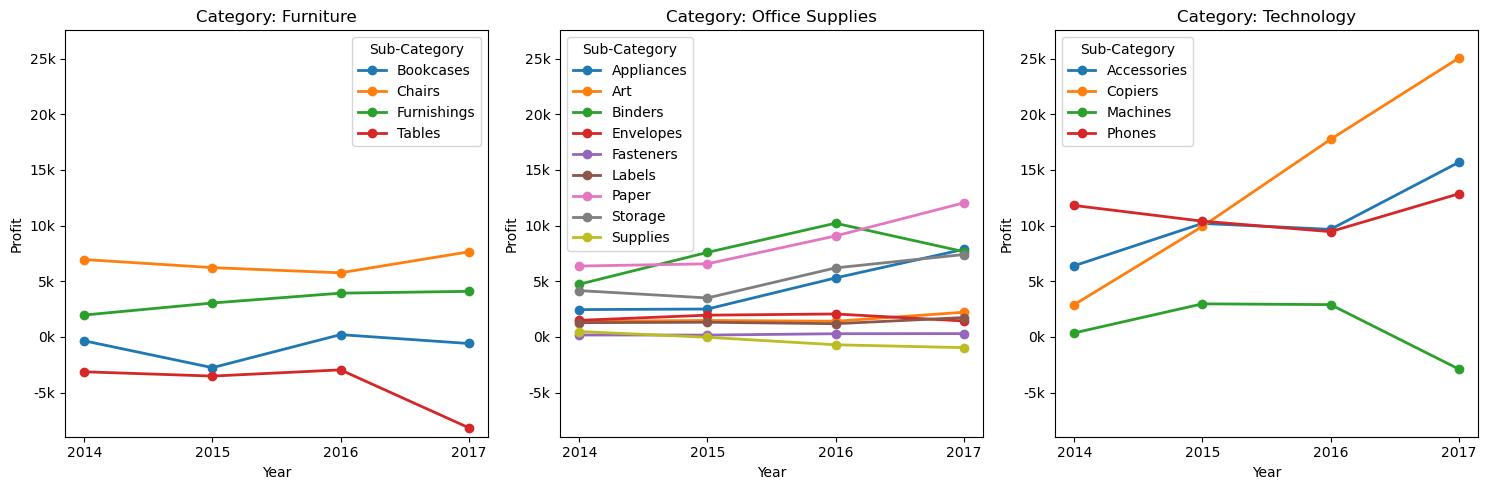

In [49]:
plt.ion()
plt.show()

In [50]:
# Region KPIs summary

# Create a copy of the original dataframe and add Discount Value for calculations:
df_region = df.copy()
df_region['Discount Value'] = df_region['Discount'] * df_region['List Price'] * df_region['Quantity']

# Group data by Region
df_region_grouped = df_region.groupby('Region')[['Profit', 'Sales', 'List Price', 'Net Price', 'Discount', 'Gross Margin', 'Quantity', 'Discount Value']].sum()

# Re-calculate relative metrics
df_region_grouped['List Price'] = (df_region_grouped['Sales'] + df_region_grouped['Discount Value']) / df_region_grouped['Quantity']
df_region_grouped['Net Price'] = df_region_grouped['Sales'] / df_region_grouped['Quantity']
df_region_grouped['Discount'] = 1 - (df_region_grouped['Net Price'] / df_region_grouped['List Price'])
df_region_grouped['Gross Margin'] = df_region_grouped['Profit'] / df_region_grouped['Sales']

# Reset index
df_region_grouped.reset_index(inplace=True)

# Drop Discount Value
df_region_grouped.drop(['Discount Value'], axis=1, inplace=True)

# Sort by Profit
df_region_grouped.sort_values(by='Profit', ascending=False, inplace=True)

# Reorder the columns 
new_column_order = ['Region', 'List Price', 'Net Price', 'Discount', 'Quantity', 'Sales', 'Profit', 'Gross Margin']
df_region_grouped = df_region_grouped[new_column_order]

In [51]:
# Profit and Sales by Region, pie charts

plt.ioff()

# Create a 1x3 subplot grid (one column for each metric)
fig, axes = plt.subplots(1, 2, figsize=(17, 3))

# Create the pie chart for Sales by Region
axes[0].pie(df_region_grouped['Sales'], labels=df_region_grouped['Region'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
axes[0].axis('equal')
axes[0].set_title('Sales', fontsize=16)

# Create the pie chart for Profit by Region
axes[1].pie(df_region_grouped['Profit'], labels=df_region_grouped['Region'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})
axes[1].axis('equal')
axes[1].set_title('Profit', fontsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

### Introduction to SWOT

📚 **Profit by Region**
 
🏆 **West** and **East** regions are the top performers, leading in both profit value and margin.  
⚠️ The **Central** region exhibits the lowest gross margin and the highest discount rate.

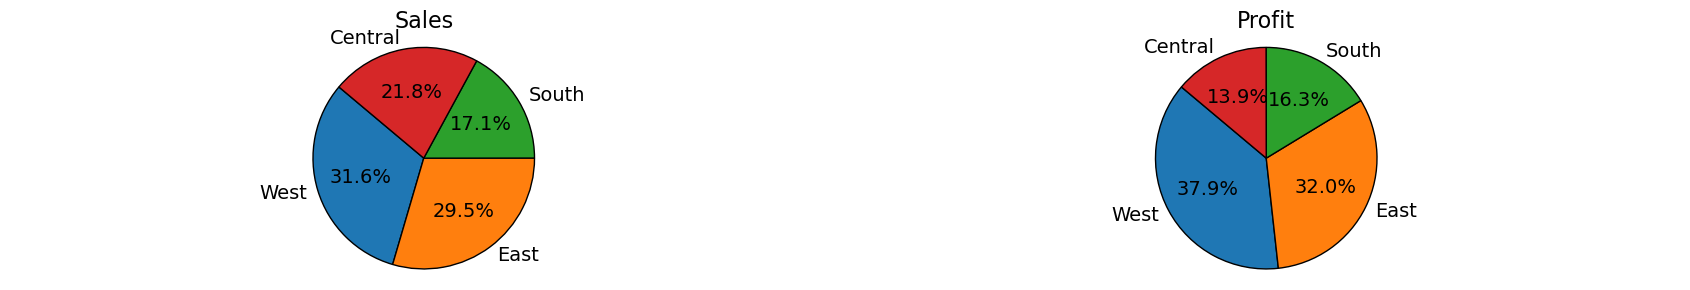

In [52]:
plt.ion()
plt.show()

In [54]:
df_region_grouped.style.format({'Profit': '{:,.0f}', 'Sales': '{:,.0f}', 'List Price': '{:.2f}', 'Net Price': '{:.2f}',
                                'Discount': '{:.2f}', 'Gross Margin': '{:.2f}', 'Quantity': '{:,.0f}'})

,Region,List Price,Net Price,Discount,Quantity,Sales,Profit,Gross Margin
3,West,70.04,59.14,0.16,"12,266","725,458","108,418",0.15
1,East,79.38,63.93,0.19,"10,618","678,781","91,523",0.13
2,South,80.14,63.09,0.21,"6,209","391,722","46,749",0.12
0,Central,75.68,57.09,0.25,"8,780","501,240","39,706",0.08


In [57]:
# Region annual trend, bar charts

plt.ioff()

# Group data by Region and Year, aggregate Profit
df_region_year = df.groupby(['Region', 'Order Year'])['Profit'].sum().reset_index()
regions = df_region_year['Region'].unique()

# Create subplots (one for each region)
fig, axes = plt.subplots(nrows=1, ncols=len(regions), figsize=(13, 4))

# Define a color for the bars
bar_color = '#1f77b4'

# Loop through each region and plot its respective bar chart
for ax, region in zip(axes, regions):

    region_data = df_region_year[df_region_year['Region'] == region]
    
    sns.barplot(data=region_data, x='Order Year', y='Profit', ax=ax, color=bar_color)
    
    ax.set_title(f'Profit by Year for {region} Region')
    ax.set_xlabel('Year')
    ax.set_ylabel('Profit')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k'))  # set format to thousands

# Adjust layout
plt.tight_layout()

### Introduction to SWOT

📈 **Profit by Region: annual trend**

🏆 The **West** and **East** regions experienced significant growth in 2017.  
⚠️ The **Central** and **South** regions had a notable increase in 2016, followed by a sharp drop in 2017.

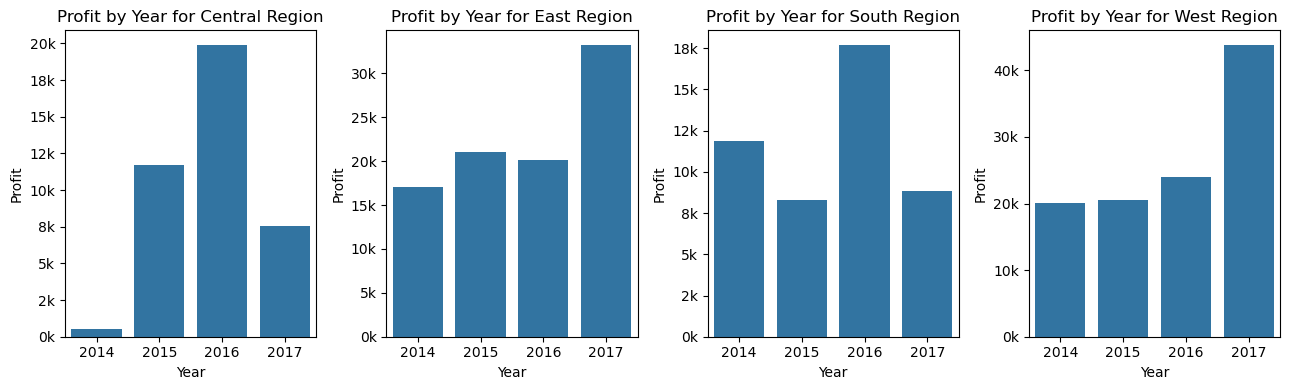

In [58]:
plt.ion()
plt.show()

In [71]:
# Region KPIs summary

# Region KPIs summary

# Create a copy of the original dataframe and add Discount Value for calculations:
df_state = df.copy()
df_state['Discount Value'] = df_state['Discount'] * df_state['List Price'] * df_state['Quantity']

# Group data by Region and State
df_state_grouped = df_state.groupby(['Region', 'State'])[['Profit', 'Sales', 'List Price', 'Net Price', 'Discount', 'Gross Margin', 'Quantity', 'Discount Value']].sum()

# Re-calculate relative metrics
df_state_grouped['List Price'] = (df_state_grouped['Sales'] + df_state_grouped['Discount Value']) / df_state_grouped['Quantity']
df_state_grouped['Net Price'] = df_state_grouped['Sales'] / df_state_grouped['Quantity']
df_state_grouped['Discount'] = 1 - (df_state_grouped['Net Price'] / df_state_grouped['List Price'])
df_state_grouped['Gross Margin'] = df_state_grouped['Profit'] / df_state_grouped['Sales']

# Reset index
df_state_grouped.reset_index(inplace=True)

# Drop Discount Value
df_state_grouped.drop(['Discount Value'], axis=1, inplace=True)

# Sort by Profit
df_state_grouped.sort_values(by='Profit', ascending=False, inplace=True)

# Reorder the columns 
new_column_order = ['Region', 'State', 'List Price', 'Net Price', 'Discount', 'Quantity', 'Sales', 'Profit', 'Gross Margin']
df_state_grouped = df_state_grouped[new_column_order]

df_state_grouped.style.format({'Profit': '{:,.0f}', 'Sales': '{:,.0f}', 'List Price': '{:.2f}', 'Net Price': '{:.2f}',
                                'Discount': '{:.2f}', 'Gross Margin': '{:.2f}', 'Quantity': '{:,.0f}'})

,Region,State,List Price,Net Price,Discount,Quantity,Sales,Profit,Gross Margin
39,West,California,68.78,59.70,0.13,"7,667","457,688","76,381",0.17
21,East,New York,81.29,73.60,0.09,"4,224","310,876","74,039",0.24
47,West,Washington,80.23,73.63,0.08,"1,883","138,641","33,403",0.24
4,Central,Michigan,81.53,80.62,0.01,946,"76,270","24,463",0.32
37,South,Virginia,79.10,79.10,0.00,893,"70,637","18,598",0.26
1,Central,Indiana,92.66,92.66,0.00,578,"53,555","18,383",0.34
30,South,Georgia,69.64,69.64,0.00,705,"49,096","16,250",0.33
31,South,Kentucky,69.97,69.97,0.00,523,"36,592","11,200",0.31
5,Central,Minnesota,90.22,90.22,0.00,331,"29,863","10,823",0.36
14,East,Delaware,75.39,74.80,0.01,367,"27,451","9,977",0.36


In [74]:
# Region by State, bar charts

plt.ioff()

regions = df['Region'].unique()

# Get min and max profit
region_min_profit = df.groupby('State')['Profit'].sum().min()*1.1
region_max_profit = df.groupby('State')['Profit'].sum().max()*1.1

# Create the figure with a size that adapts to the number of categories
plt.figure(figsize=(15, 5.5))

# Loop through categories and plot each one
for i, region in enumerate(regions, start=1):
    ax = plt.subplot(1, 4, i)
    
    # Filter data for the current region
    region_data = df[df['Region'] == region]
    
    # Sum profit by State
    profit_by_state = region_data.groupby('State')['Profit'].sum()
    
    # Plot the bar chart with adjusted bar width and spacing
    profit_by_state.plot(kind='bar', ax=ax)  # Decrease width to create space between bars
    
    # Set title and labels
    ax.set_title(f'Region: {region}')
    ax.set_xlabel('State')
    ax.set_ylabel('Profit')
    
    # Adjust x-tick labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Set y-axis limits to ensure no bars are cut off
    ax.set_ylim(region_min_profit, region_max_profit)

    # Format y-axis in thousands
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # format y-axis in thousands
    
# Adjust layout
plt.tight_layout()

### Introduction to SWOT

📚 **Profit by State**

💡 The **West** and **East** regions are home to the top 3 states in terms of profit (_California, Washington and New York_), which explains their dominant share. In contrast, the **Central** and **South** regions do not have any positive outliers. Moreover, the **Central** region is particularly impacted by two significant negative outliers (_Illinois and Texas_).

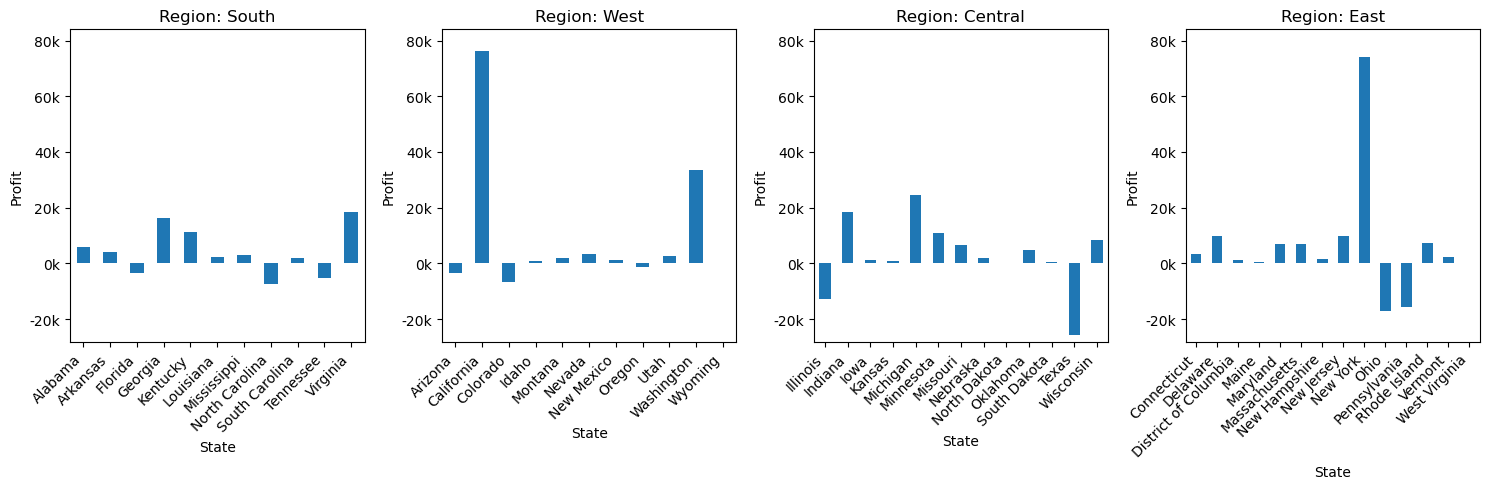

In [75]:
plt.ion()
plt.show()

In [72]:
# Top10 and Bottom10 states by Profit, bar charts

plt.ioff()

# Sort the dataframe by 'Profit' and get the top and bottom 10 states
top_10_states = df.groupby('State')['Profit'].sum().reset_index()
top_10_states = top_10_states.sort_values(by='Profit', ascending=False).head(10)

bottom_10_states = df.groupby('State')['Profit'].sum().reset_index()
bottom_10_states = bottom_10_states.sort_values(by='Profit', ascending=True).head(10)

# Create subplots: left for top 10, right for bottom 10
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Top 10 Bar Chart with dark green bars
sns.barplot(data=top_10_states, x='State', y='Profit', ax=axes[0], palette=['darkgreen']*len(top_10_states))
axes[0].set_title('Top 10 States by Profit')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Profit')
axes[0].tick_params(axis='x', rotation=45)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands

# Bottom 10 Bar Chart with dark red bars
sns.barplot(data=bottom_10_states, x='State', y='Profit', ax=axes[1], palette=['darkred']*len(bottom_10_states))
axes[1].set_title('Bottom 10 States by Profit')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Profit')
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # set format to thousands

# Adjust layout
plt.tight_layout()

In [80]:
# Additional insights

print(df['Profit'].sum())
print(top_10_states['Profit'].sum())
print(bottom_10_states['Profit'].sum())

286397.0217
293516.96379999997
-98246.74069999998


### Introduction to SWOT

📚 **Top10 and Bottom10 States**

💡 The top 10 states contribute a total profit of 293k dollars, surpassing the overall supermarket profit of 286k dollars. However, this is counterbalanced by ten states with a combined negative profit of -98k dollars, all of which have high average discounts above 30%.

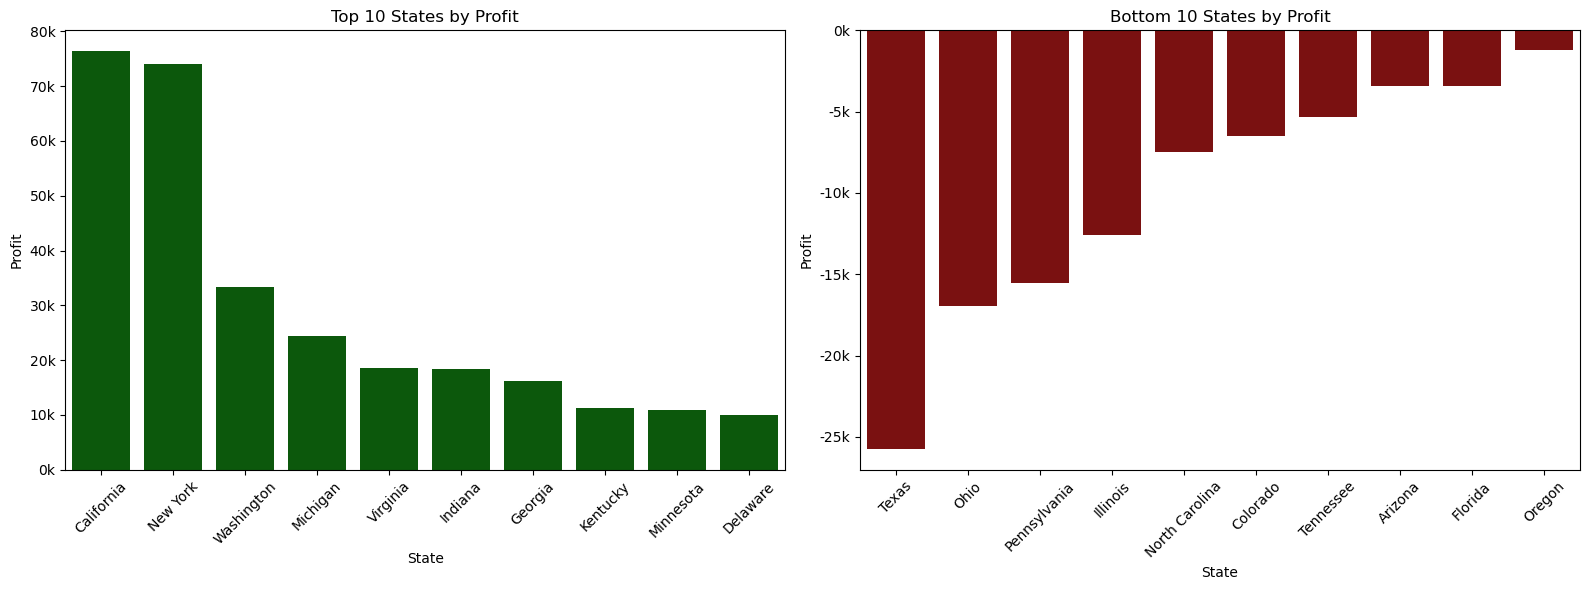

In [73]:
plt.ion()
plt.show()

In [83]:
# Top10 and Bottom10 states by Profit, annual trend

plt.ioff()

# Step 1: Calculate total profit for each state
state_profit = df.groupby('State')['Profit'].sum().reset_index()

# Step 2: Get top 10 and bottom 10 states based on total profit
top_10_states = state_profit.nlargest(10, 'Profit')['State']
bottom_10_states = state_profit.nsmallest(10, 'Profit')['State']

# Step 3: Filter the original dataframe for top 10 and bottom 10 states
df_top10 = df[df['State'].isin(top_10_states)]
df_bottom10 = df[df['State'].isin(bottom_10_states)]

# Step 4: Calculate the yearly profit trends for top 10 and bottom 10 states
df_top10_yearly = df_top10.groupby(['Order Year', 'State'])['Profit'].sum().reset_index()
df_bottom10_yearly = df_bottom10.groupby(['Order Year', 'State'])['Profit'].sum().reset_index()

# Step 5: Aggregate to get the average profit per year for top 10 and bottom 10 states
df_top10_avg = df_top10_yearly.groupby('Order Year')['Profit'].mean().reset_index()
df_bottom10_avg = df_bottom10_yearly.groupby('Order Year')['Profit'].mean().reset_index()

# Step 6: Get the top-performing state (just the one with the highest profit)
top_state = state_profit.nlargest(1, 'Profit')['State'].iloc[0]
df_top_state_yearly = df[df['State'] == top_state].groupby(['Order Year'])['Profit'].sum().reset_index()

# Step 7: Get the bottom-performing state (just the one with the lowest profit)
bottom_state = state_profit.nsmallest(1, 'Profit')['State'].iloc[0]
df_bottom_state_yearly = df[df['State'] == bottom_state].groupby(['Order Year'])['Profit'].sum().reset_index()

# Step 8: Create subplots for the profit trends
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.5))

# Plot Top 10 States (Average Profit per Year) and Top-performing State's Trend
sns.lineplot(data=df_top_state_yearly, x='Order Year', y='Profit', ax=axes[0], label=f'Top State: {top_state}', color='blue', lw=2)
sns.lineplot(data=df_top10_avg, x='Order Year', y='Profit', ax=axes[0], label='Average of Top 10 States', color='green', lw=2)
axes[0].set_title('Profit Trend for Average of Top 10 States')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Profit')
axes[0].legend()
axes[0].set_xticks(df['Order Year'].unique())
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k'))

# Plot Bottom 10 States (Average Profit per Year) and Bottom-performing State's Trend
sns.lineplot(data=df_bottom_state_yearly, x='Order Year', y='Profit', ax=axes[1], color='red', lw=2, label=f'Bottom State: {bottom_state}')
sns.lineplot(data=df_bottom10_avg, x='Order Year', y='Profit', ax=axes[1], color='orange', lw=2, label='Average of Bottom 10 States')
axes[1].set_title('Profit Trend for Average of Bottom 10 States')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Profit')
axes[1].legend()
axes[1].set_xticks(df['Order Year'].unique())
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k'))

# Adjust layout
plt.tight_layout()

### Introduction to SWOT

📈 **Top10 and Bottom10 States: annual trend**

- The **Top 10 states' average profit** demonstrates a positive trend, consistent with the performance of the top-performing state, **_California_**.
- The **Bottom 10 states' average profit** has experienced a decline over the past three years, largely driven by **_Texas_**, the lowest performer, which saw a significant drop in profits during 2016 and 2017.

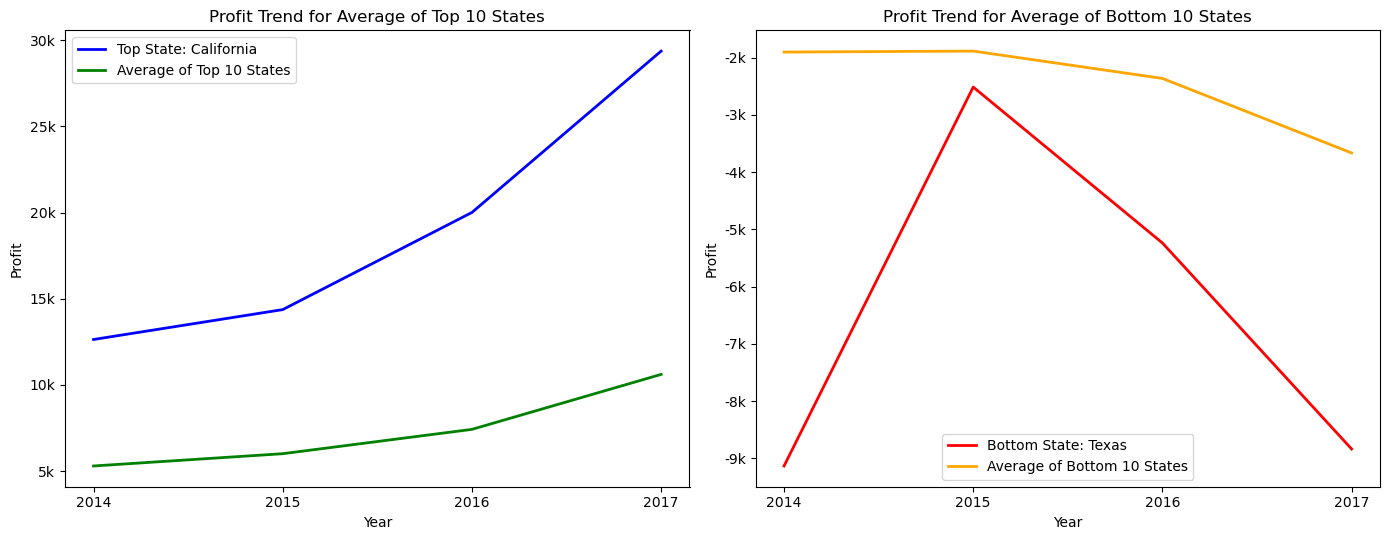

In [84]:
plt.ion()
plt.show()

In [95]:
# Profit by state, by region and product category

plt.ioff()


# Transform data
grouped_data = df.groupby(['Region', 'State', 'Category'], as_index=False)['Profit'].sum()

pivot_data = grouped_data.pivot_table(index=['Region', 'State'], columns='Category', values='Profit', aggfunc='sum', fill_value=0)


# Create figure and axis
plt.figure(figsize=(15, 5.5))

regions = pivot_data.index.get_level_values('Region').unique()
for i, region in enumerate(regions, start=1):
    plt.subplot(1, 4, i)

    region_data = pivot_data.xs(region, level='Region')

    region_data.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)
    
    plt.title(f'Region: {region}')
    plt.xlabel('State')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(top=region_max_profit, bottom=region_min_profit)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1000:.0f}k')) # format y-axis in thousands

# Adjust layout    
plt.tight_layout()

### Introduction to SWOT

📚 **Profit by State and Product Category**

💡 The analysis reveals that certain product categories, typically profitable in most states, are unprofitable in the bottom-performing states. Further investigation is needed to identify the internal and external factors contributing to this disparity.

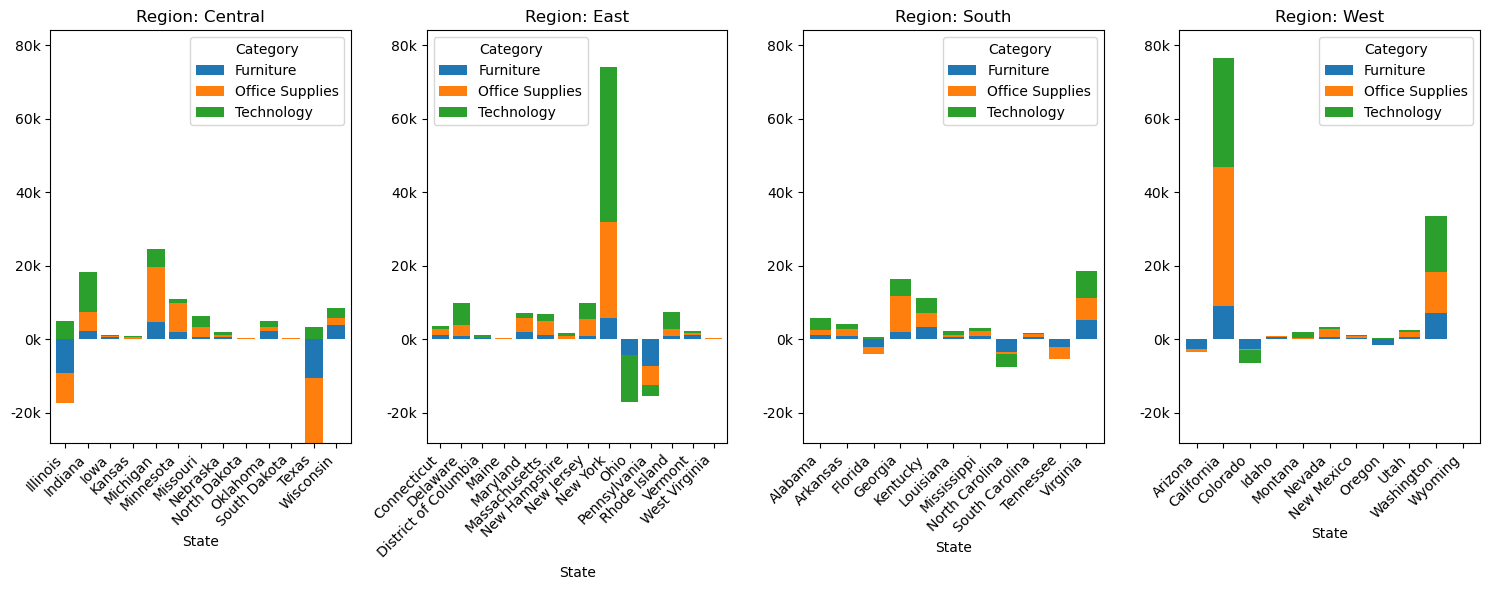

In [94]:
plt.ion()
plt.show()

In [96]:
# Hypotesys test - List Price:

# Hº = the mean of list price for Furniture is equal by state


furniture_df = df[df['Category'] == 'Furniture']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['List Price'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'List Price' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.")

F-statistic: 1.4799007015120578
P-value: 0.01935899218906737
Reject the null hypothesis: The mean 'List Price' is significantly different by State.


In [97]:
# Hypotesys test - Discount:

# Hº = the mean of discount for Furniture is equal by state


furniture_df = df[df['Category'] == 'Furniture']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['Discount'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'Discount' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'Discount' is not significantly different by State.")

F-statistic: 83.66956000020525
P-value: 0.0
Reject the null hypothesis: The mean 'Discount' is significantly different by State.


In [98]:
# Hypotesys test - List Price:

# Hº = the mean of list price for Office Supplies is equal by state


furniture_df = df[df['Category'] == 'Office Supplies']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['List Price'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'List Price' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.")

F-statistic: 1.059875485039983
P-value: 0.362728000427097
Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.


In [99]:
# Hypotesys test - Discount:

# Hº = the mean of discount for Office Supplies is equal by state


furniture_df = df[df['Category'] == 'Office Supplies']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['Discount'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'Discount' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'Discount' is not significantly different by State.")

F-statistic: 128.18782151131293
P-value: 0.0
Reject the null hypothesis: The mean 'Discount' is significantly different by State.


In [100]:
# Hypotesys test - List Price:

# Hº = the mean of list price for Technology is equal by state


furniture_df = df[df['Category'] == 'Technology']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['List Price'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'List Price' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.")

F-statistic: 0.55664242934307
P-value: 0.9926429121431197
Fail to reject the null hypothesis: The mean 'List Price' is not significantly different by State.


In [101]:
# Hypotesys test - Discount:

# Hº = the mean of discount for Technology is equal by state


furniture_df = df[df['Category'] == 'Technology']

states = furniture_df['State'].unique()

price_by_state = [furniture_df[furniture_df['State'] == state]['Discount'] for state in states]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*price_by_state)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean 'Discount' is significantly different by State.")
else:
    print("Fail to reject the null hypothesis: The mean 'Discount' is not significantly different by State.")

F-statistic: 78.65221482717071
P-value: 0.0
Reject the null hypothesis: The mean 'Discount' is significantly different by State.


### Introduction to SWOT

🔍 **Pricing and Discount Strategy by State and Product Category**

💡 After conducting an ANOVA hypothesis test with a 5% alpha level, the following findings were observed:

- **Furniture**: Both the List Price and the Discount vary significantly across states, which may explain the **noticeable differences in profitability** of Furniture **by state**.
- **Office Supplies & Technology**: While the List Price remains consistent across states, the **Discount policy shows significant variation**.

### Clustering

In [ ]:
def levels(x):
    if x < 0:
        return 'Low'
    elif 0 <= x <= 28.66:
        return 'Medium'
    else:
        return 'High'

In [ ]:
df['Profit Level'] = df['Profit'].apply(lambda row: levels(row))
df.head()

In [ ]:
df_high = df[df['Profit Level'] == 'High']
df_medium = df[df['Profit Level'] == 'Medium']
df_low = df[df['Profit Level'] == 'Low']

print(f'Order items with high profit: {len(df_high)}')
print(f'Order items with medium profit: {len(df_medium)}')
print(f'Order items with low profit: {len(df_low)}')

#df_high = df_high.drop('Profit Level', axis=1)

#df_high

In [ ]:
# Scatter plot - Profit vs Sales by Profit Level:

plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, y='Profit', x='Sales', hue='Profit Level', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7)

plt.title('Scatter plot of Profit vs Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.ylim(ymax=6000)
plt.xlim(xmax=12000)

plt.grid(True, linestyle='--', alpha=0.5) 

In [ ]:
# Plot KDE for Discount - High Profit

plt.figure(figsize=(8, 3))
sns.kdeplot(data=df_high, x='Discount', label='Discount', fill=True)

plt.title('Distribution of Discounts and Sales')
plt.xlabel('Discount %')
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

In [ ]:
# Plot KDE for Discount - Medium Profit

plt.figure(figsize=(8, 3))
sns.kdeplot(data=df_medium, x='Discount', label='Discount', fill=True)

plt.title('Distribution of Discounts and Sales')
plt.xlabel('Discount %')
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

In [ ]:
# Plot KDE for Discount - Low Profit

plt.figure(figsize=(8, 3))
sns.kdeplot(data=df_low, x='Discount', label='Discount', fill=True)

plt.title('Distribution of Discounts and Sales')
plt.xlabel('Discount %')
plt.xticks(np.arange(0, 1, step=0.1))
plt.ylabel('Density')
plt.legend()
plt.tight_layout()

**INSIGHTS**:
- For High and Medium Profit, the most frequent discount is 0% or 20%
- For Low or negative Profit, tere are two peacks in Discount Distribution: 10-50% and 50-90%

In [ ]:
# Distribution by state

# 1. Calculate the total profit by State
df_by_state = df.groupby(['State', 'City']).agg(
    Total_Profit=('Profit', 'sum'),
    Total_Orders=('Order ID', 'count'))

# 2. Calculate the probabilities of Profit Level by State
probabilities = df.groupby(['State', 'City'])['Profit Level'].value_counts(normalize=True).unstack(fill_value=0)
new_order = ['High', 'Medium', 'Low']
probabilities = probabilities[new_order]

# 3. Combine the total profit and probabilities into one DataFrame
result = pd.concat([df_by_state, probabilities], axis=1).sort_values(by=['State', 'Total_Orders'], ascending=[True, False])

result

In [ ]:
result_ncarolina = result.loc['North Carolina']

result_ncarolina

Conclusion: within the same State, Cities have different patterns in terms of profit.

### Machine learning

In [ ]:
import umap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

#### Dimension reduction: UMAP

In [ ]:
df_umap = df_low[[x for x in df_low.columns if x != 'Profit']]
target = np.array(df_low['Profit'])

In [ ]:
# Label Encoding for categorical features

cat_vars = cat_vars + ['Profit Level']

label_encoder = LabelEncoder()

for col in cat_vars:
    df_umap.loc[:, col] = label_encoder.fit_transform(df_umap[col])
    
df_umap.head()

In [ ]:
# Scaling

scaler = StandardScaler()

df_scaled_umap = scaler.fit_transform(df_umap)

#df_scaled_umap

In [ ]:
# Train the reducer

reducer = umap.UMAP(random_state=42, 
                    n_neighbors=5, 
                    min_dist=0,
                    n_components=2,
                    metric='euclidean')
reducer.fit(df_scaled_umap)

In [ ]:
# Transform dataset into 2D shape

embedding = reducer.transform(df_scaled_umap)

embedding_df = pd.DataFrame(embedding)
embedding_df

#### Clustering: DBSCAN

In [ ]:
dbscan_c = DBSCAN(eps=0.5,
                  min_samples=25).fit(embedding)

dbscan_c

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=dbscan_c.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
unique_labels = np.unique(dbscan_c.labels_)
plt.colorbar(boundaries=np.arange(unique_labels.min() - 0.5, unique_labels.max() + 1.5, 1))\
    .set_ticks(np.arange(unique_labels.min(), unique_labels.max() + 1))
plt.title('DBSCAN over the Superstore dataset', fontsize=24)

In [ ]:
check_emb_dbscan = pd.DataFrame({'Profit':target, 'Infered Labels':dbscan_c.labels_})
unique_clusters = np.unique(dbscan_c.labels_)
print(unique_clusters)
print(f'Total clusters infered: {len(unique_clusters)}')
check_emb_dbscan

In [ ]:
df_low_cat = pd.merge(df_low, check_emb_dbscan)

df_low_cat.head()

In [ ]:
df_low_cat['Infered Labels'].value_counts()

In [ ]:
df_levels = df_low_cat.groupby('Infered Labels').agg(
    profit_sum=('Profit', 'sum'),
    profit_mean=('Profit', 'mean'),
    discount_mean=('Discount', 'mean'),
    sales_sum=('Sales', 'sum'),
    quantity_sum=('Quantity', 'sum'),
).reset_index()

df_levels['profit_sum'] = df_levels['profit_sum']/1000
df_levels['sales_sum'] = df_levels['sales_sum']/1000
df_levels['quantity_sum'] = df_levels['quantity_sum']/1000
df_levels['gross_margin'] = df_levels['profit_sum'] / df_levels['sales_sum']
    
df_levels = df_levels.sort_values(by='profit_sum', ascending = False)

df_levels.sort_values(by='Infered Labels')

In [ ]:
# Lets have a close look at the categories with the biggest profit loss (almost -100M profit): -1, 5 and 7. 

df_low_catm1 = df_low_cat[df_low_cat['Infered Labels'] == -1]
df_low_cat4 = df_low_cat[df_low_cat['Infered Labels'] == 4]
df_low_cat6 = df_low_cat[df_low_cat['Infered Labels'] == 6]

#df_low_cat0.head()

In [ ]:

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

sns.scatterplot(data=df_low_catm1, y='Profit', x='Sales', hue='Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[0])

axes[0].set_title('Label -1')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Profit')
axes[0].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat4, y='Profit', x='Sales', hue='Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[1])

axes[1].set_title('Label 4')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Profit')
axes[1].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat6, y='Profit', x='Sales', hue='Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[2])

axes[2].set_title('Label 6')
axes[2].set_xlabel('Sales')
axes[2].set_ylabel('Profit')
axes[2].grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()

In [ ]:

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

sns.scatterplot(data=df_low_catm1, y='Profit', x='Sales', hue='State', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[0])

axes[0].set_title('Label -1')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Profit')
axes[0].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat4, y='Profit', x='Sales', hue='State', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[1])

axes[1].set_title('Label 4')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Profit')
axes[1].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat6, y='Profit', x='Sales', hue='State', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[2])

axes[2].set_title('Label 6')
axes[2].set_xlabel('Sales')
axes[2].set_ylabel('Profit')
axes[2].grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()


In [ ]:

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

sns.scatterplot(data=df_low_catm1, y='Profit', x='Sales', hue='Sub-Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[0])

axes[0].set_title('Label -1')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Profit')
axes[0].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat4, y='Profit', x='Sales', hue='Sub-Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[1])

axes[1].set_title('Label 4')
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Profit')
axes[1].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(data=df_low_cat6, y='Profit', x='Sales', hue='Sub-Category', palette='Set1', size='Discount',
               sizes=(20, 120), edgecolor='black', linewidth=0.4, alpha=0.7, ax=axes[2])

axes[2].set_title('Label 6')
axes[2].set_xlabel('Sales')
axes[2].set_ylabel('Profit')
axes[2].grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()


**INSIGHTS**:
- Label -1: avg. discount 30%-70%, mainly Office - Binders (Texas) and Tech - Machines (Ohio)
- Label 4: avg. discount 30%-45%, mainly Furniture - All product categories (Illinois & Texas)
- Label 6: avg. discount 20-60%, mainly Technology - Phones & Machines (Ohio)

**Conclusion**: as next step we need to identify differences between these clusters and the rest of the dataset where the same filters deliver positive profit.